In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Predicting Tree Cover Loss

# Data Introduction 

## Data Source 

This data was sourced from the link below:

https://www.kaggle.com/datasets/karnikakapoor/global-forest-data-2001-2022?resource=download

## Data Dictionary

| Field Name      | Description                                                | Units of Measurement                              |
|-----------------|------------------------------------------------------------|---------------------------------------------------|
| Tree Cover      | Vegetation over 5 meters in height                         |                                                   |
| country         | Country                                                    |                                                   |
| threshold       | Percent canopy cover                   | >10%, 15%, 20%, 25%, 30%, 50%, and 75%           |
| area_ha         | Area of country                                            | Hectares                                          |
| extent_2000_ha | Area covered by defined threshold for year 2000            | Hectares                                          |
| extent_2010_ha | Area covered by defined threshold for year 2010            |                                                   |
| gain_2000-2020_ha | Metdata was not clear on this measurement              |                                                   |
| tc_loss_ha_     | Tree cover loss for the specified year                     | Hectares                                          |

## Preview of Dataframe

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 1.5.3
numpy version: 1.23.5


In [4]:
# Loads the data into a dataframe
TC_loss_orig = pd.read_csv("Country tree cover loss.csv")
TC_loss_df = TC_loss_orig.copy()
display(TC_loss_df.head(5))
display(TC_loss_df.tail(5))

,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022
0,Afghanistan,0,64385715,64385715,64385715,10741,103,214,267,225,...,15,9,0,0,0,32,26,46,47,15
1,Afghanistan,10,64385715,432115,126247,10741,92,190,253,207,...,2,4,0,0,0,28,19,40,37,9
2,Afghanistan,15,64385715,302660,106867,10741,91,186,247,205,...,2,3,0,0,0,28,18,39,32,8
3,Afghanistan,20,64385715,284357,105733,10741,89,180,245,203,...,2,3,0,0,0,28,18,39,32,8
4,Afghanistan,25,64385715,254867,72395,10741,89,180,245,202,...,1,3,0,0,0,27,18,38,28,7


,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022
1883,Åland,20,150643,109886,108495,2583,397,278,221,736,...,510,551,568,675,737,621,2364,675,1357,1173
1884,Åland,25,150643,108737,104690,2583,397,278,221,736,...,510,551,568,674,736,620,2363,674,1356,1170
1885,Åland,30,150643,107727,103074,2583,397,278,221,736,...,510,550,567,673,735,620,2361,673,1355,1166
1886,Åland,50,150643,87761,85289,2583,389,274,216,728,...,506,536,548,641,705,604,2331,663,1327,1098
1887,Åland,75,150643,60880,60453,2583,357,256,205,694,...,472,481,484,550,606,537,2180,607,1193,926


# Visualizations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogram of Target Variable

The tree cover loss in 2021 is the target variable. Data for the year 2022 will be used as a holdout validation set.

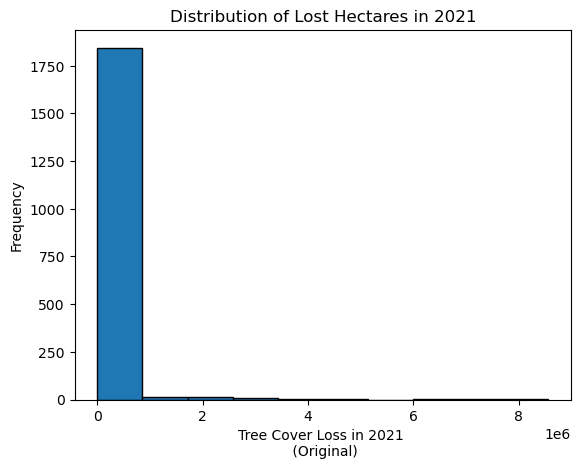

In [6]:
plt.hist(TC_loss_df["tc_loss_ha_2021"], edgecolor = "black")

plt.title("Distribution of Lost Hectares in 2021")
plt.xlabel("Tree Cover Loss in 2021 \n (Original)")
plt.ylabel("Frequency")

plt.show()

The distribution is not normally distributed and is difficult to visualize. There appears to be a gap in data between 5-6. Value cannot be gleaned from this histogram. The data should undergo transformation to obtain a more normalized distribution.

## Box Plots

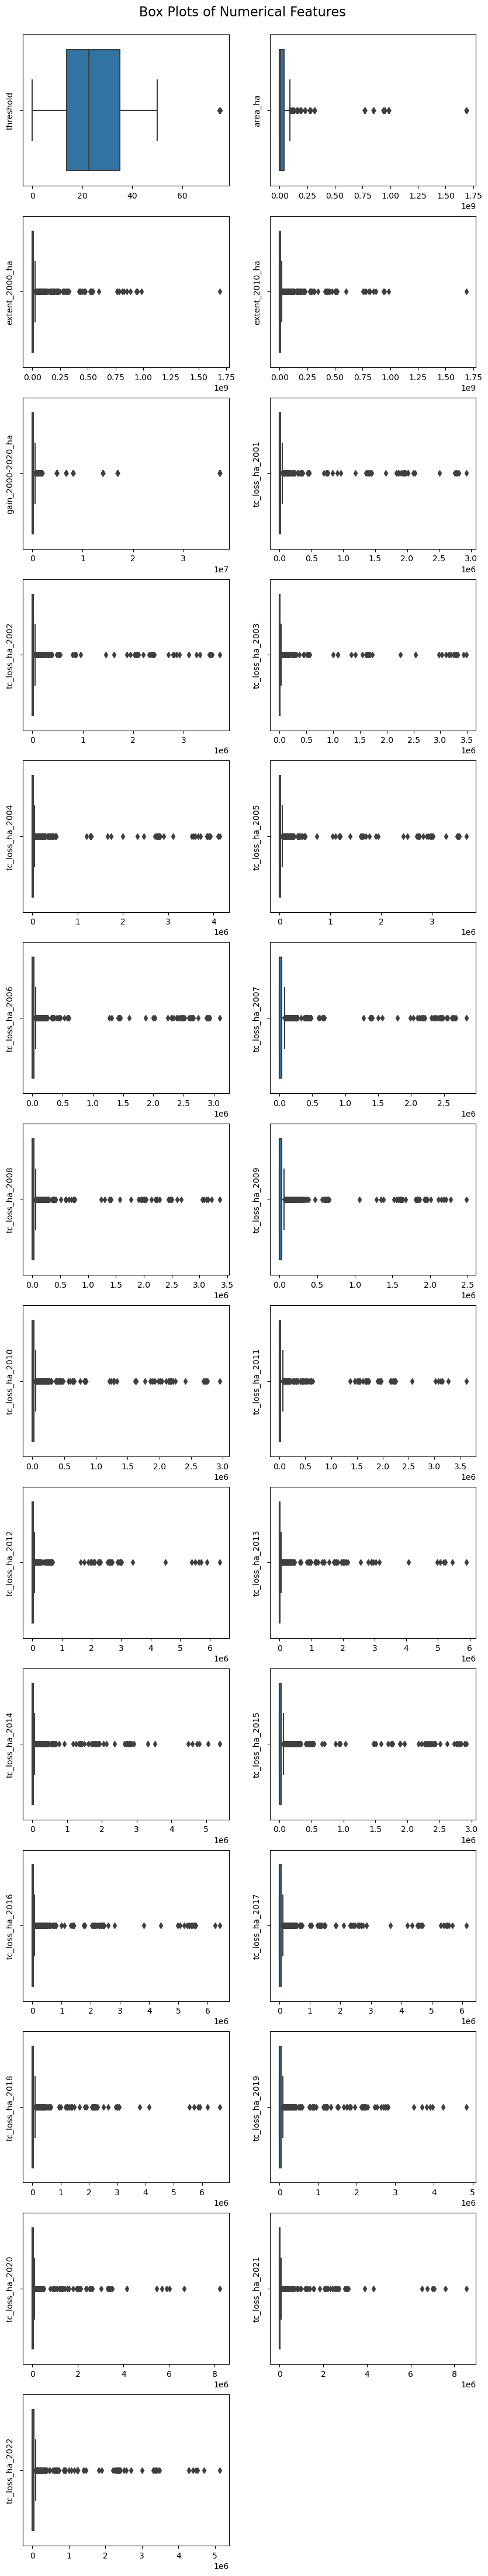

In [7]:
# Creates a list of all the numeric columns
numeric_columns = TC_loss_df.select_dtypes("number").columns

# Finds the length of the list
num_subplots = len(numeric_columns)

# Finds the number of rows needed to plot the list
num_rows = (num_subplots + 1) // 2

fig, axs = plt.subplots(nrows = num_rows, ncols = 2, figsize = (10, 50))


for i, column in enumerate(numeric_columns):
    row_index = i // 2
    col_index = i % 2
    
    sns.boxplot(x = TC_loss_df[column], ax = axs[row_index, col_index])
    axs[row_index, col_index].set_ylabel(column)
    axs[row_index, col_index].set(xlabel = "")
    
if num_subplots % 2 != 0:
    fig.delaxes(axs[num_rows - 1, 1])

fig.suptitle("Box Plots of Numerical Features", fontsize=16)

plt.subplots_adjust(top=.97)

plt.show()

The box plots show outliers in every single column. Based on this and the histogram of the target variable, transformations should be applied. Interestingly, they also show outliers in the threshold column, which is not truly numerical, but rather categorical.

# Log Transformation

To handle the non-normal distribution of the target variable as well as numerous outliers, the hectare values will be log-transformed.

In [8]:
TC_transformed_df = TC_loss_df.copy()

# Finds all numerical columns
columns_to_transform = TC_loss_df.select_dtypes(
    include = [np.number]).columns.tolist()
columns_to_transform.remove("threshold")

for column in columns_to_transform:
    # Takes the log of each value
    TC_transformed_df[f"{column}_log"] = np.log1p(
        TC_transformed_df[column])

# Drops the original columns
TC_transformed_df.drop(columns=columns_to_transform, 
                       inplace=True)

In [9]:
display(TC_transformed_df.head(5))

,country,threshold,area_ha_log,extent_2000_ha_log,extent_2010_ha_log,gain_2000-2020_ha_log,tc_loss_ha_2001_log,tc_loss_ha_2002_log,tc_loss_ha_2003_log,tc_loss_ha_2004_log,...,tc_loss_ha_2013_log,tc_loss_ha_2014_log,tc_loss_ha_2015_log,tc_loss_ha_2016_log,tc_loss_ha_2017_log,tc_loss_ha_2018_log,tc_loss_ha_2019_log,tc_loss_ha_2020_log,tc_loss_ha_2021_log,tc_loss_ha_2022_log
0,Afghanistan,0,17.980402,17.980402,17.980402,9.281917,4.644391,5.370638,5.590987,5.420535,...,2.772589,2.302585,0.0,0.0,0.0,3.496508,3.295837,3.850148,3.871201,2.772589
1,Afghanistan,10,17.980402,12.976449,11.746004,9.281917,4.532599,5.252273,5.537334,5.337538,...,1.098612,1.609438,0.0,0.0,0.0,3.367296,2.995732,3.713572,3.637586,2.302585
2,Afghanistan,15,17.980402,12.620369,11.579350,9.281917,4.521789,5.231109,5.513429,5.327876,...,1.098612,1.386294,0.0,0.0,0.0,3.367296,2.944439,3.688879,3.496508,2.197225
3,Afghanistan,20,17.980402,12.557989,11.568682,9.281917,4.499810,5.198497,5.505332,5.318120,...,1.098612,1.386294,0.0,0.0,0.0,3.367296,2.944439,3.688879,3.496508,2.197225
4,Afghanistan,25,17.980402,12.448501,11.189906,9.281917,4.499810,5.198497,5.505332,5.313206,...,0.693147,1.386294,0.0,0.0,0.0,3.332205,2.944439,3.663562,3.367296,2.079442


## Histogram of Log - Transformed Target Variable 

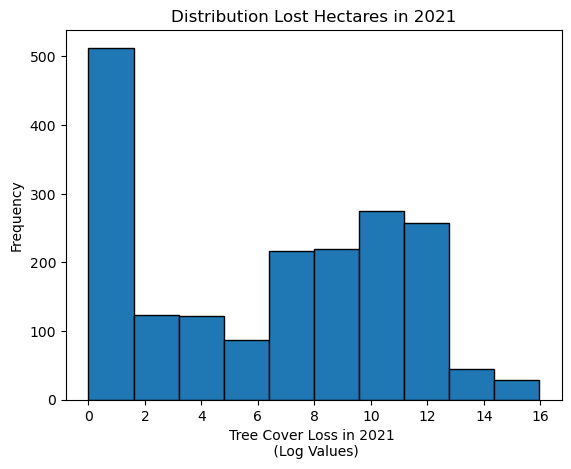

In [10]:
plt.hist(TC_transformed_df["tc_loss_ha_2021_log"], 
         edgecolor = "black")

plt.title("Distribution Lost Hectares in 2021")
plt.xlabel("Tree Cover Loss in 2021 \n (Log Values)")
plt.ylabel("Frequency")

plt.show()

The distributions looks better than before, however there is a large peak between 0 - 1.8 log hectares. This could be due to fewer hectares lost by a large number of small countries or potentially missing data represented as 0.

## Histogram of Log Transformed Numeric Features

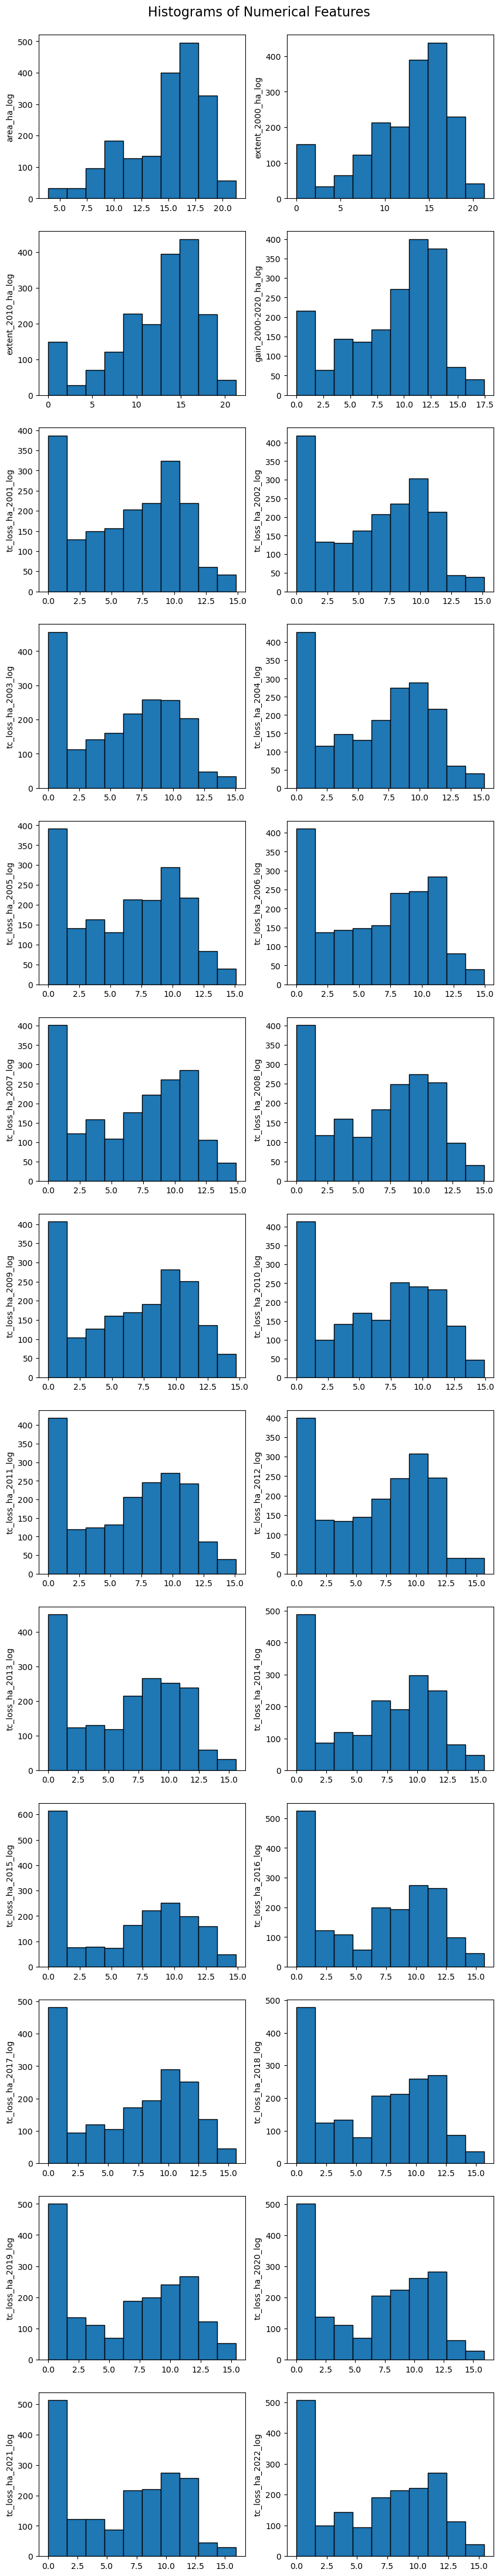

In [11]:
# Creates a list of all the numeric columns
numeric_columns = TC_transformed_df.select_dtypes(
    "number").columns
numeric_columns = numeric_columns[
    numeric_columns != "threshold"]

# Finds the length of the list
num_subplots = len(numeric_columns)

# Finds the number of rows needed to plot the list
num_rows = (num_subplots + 1) // 2

fig, axs = plt.subplots(nrows = num_rows, ncols = 2, 
                        figsize = (10, 50))


for i, column in enumerate(numeric_columns):
    row_index = i // 2
    col_index = i % 2
    
    axs[row_index, col_index].hist(x=TC_transformed_df[
        column], edgecolor = "black")
    axs[row_index, col_index].set_ylabel(column)
    axs[row_index, col_index].set(xlabel = "")

fig.suptitle("Histograms of Numerical Features", 
             fontsize=16)

if num_subplots % 2 != 0:
      fig.delaxes(axs[num_rows - 1, num_subplots % 2])

plt.subplots_adjust(top=.97)

plt.show()

The area_ha_log histogram shows left-skewness. This indicates there are more countries with relatively large land mass than small countries with fewer hectares.

Almost every single plot appears to be left-skewed, but with a very large peak between 0-2.0 hectares. This could potentially indicate very tree cover loss but it could also indicate missing data. This will need to be taken into consideration during data cleaning.

## Box Plots - Log Transformed 

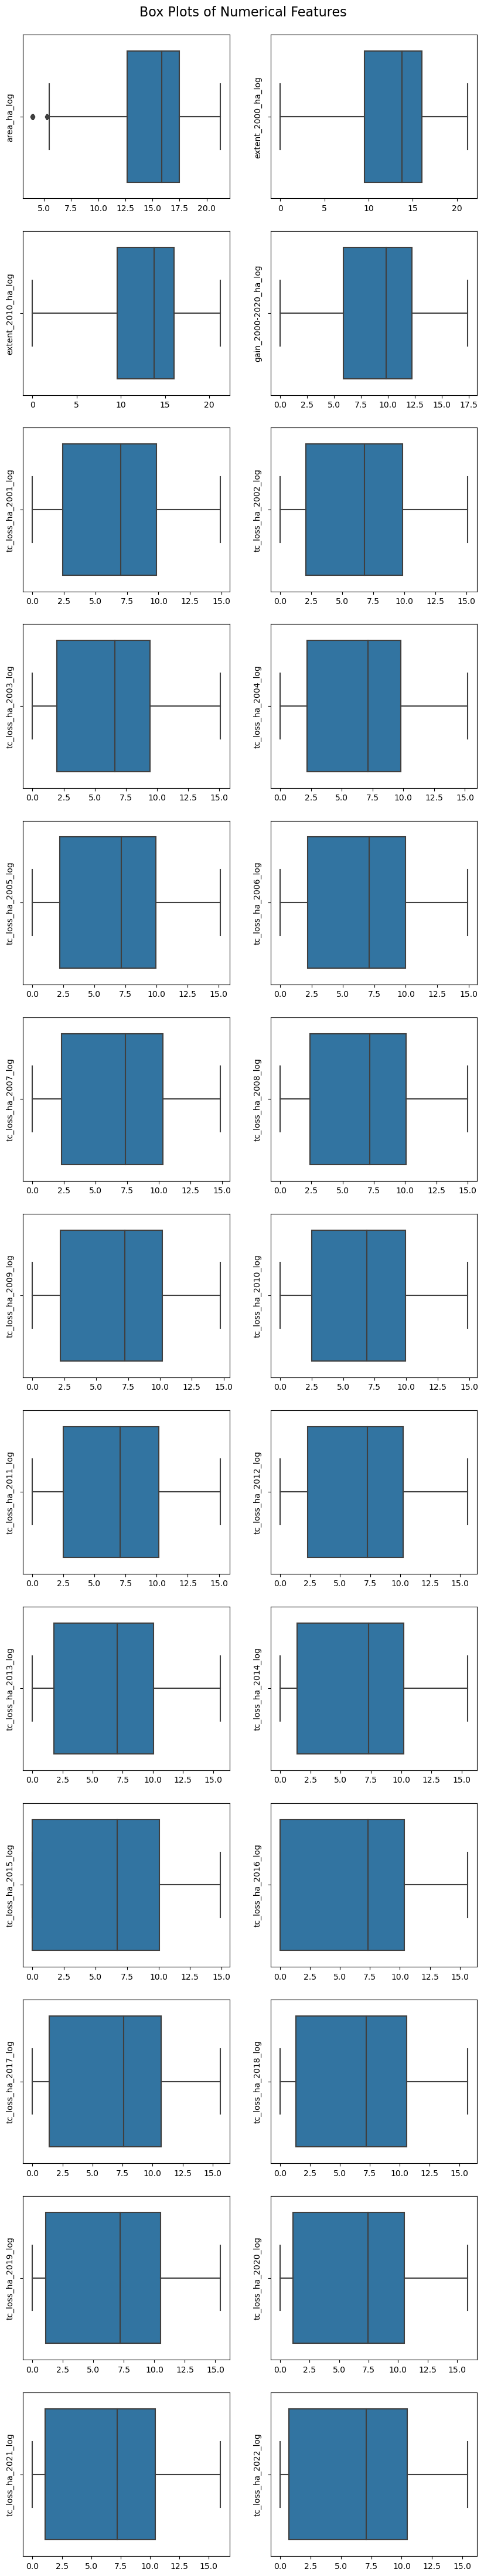

In [12]:
fig, axs = plt.subplots(nrows = num_rows, ncols = 2, 
                        figsize = (10, 50))


for i, column in enumerate(numeric_columns):
    row_index = i // 2
    col_index = i % 2
    
    sns.boxplot(x = TC_transformed_df[column], ax = axs[
        row_index, col_index])
    axs[row_index, col_index].set_ylabel(column)
    axs[row_index, col_index].set(xlabel = "")

fig.suptitle("Box Plots of Numerical Features", 
             fontsize=16)

if num_subplots % 2 != 0:
    fig.delaxes(axs[num_rows - 1, 1])

plt.subplots_adjust(top=.97)

plt.show()

The box plots of the transformed data show that outliers have been handled by the transformation. They also show the effects of the lower hectare loss as many of the box plots have a large distance between Q1 & the median. 

# Exploratory Data Analysis

In [13]:
TC_transformed_df.describe()

,threshold,area_ha_log,extent_2000_ha_log,extent_2010_ha_log,gain_2000-2020_ha_log,tc_loss_ha_2001_log,tc_loss_ha_2002_log,tc_loss_ha_2003_log,tc_loss_ha_2004_log,tc_loss_ha_2005_log,...,tc_loss_ha_2013_log,tc_loss_ha_2014_log,tc_loss_ha_2015_log,tc_loss_ha_2016_log,tc_loss_ha_2017_log,tc_loss_ha_2018_log,tc_loss_ha_2019_log,tc_loss_ha_2020_log,tc_loss_ha_2021_log,tc_loss_ha_2022_log
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,28.125000,14.891014,12.270425,12.295576,8.876615,6.273272,6.168453,5.962426,6.283811,6.300406,...,6.320694,6.443139,5.910212,6.365527,6.618056,6.398616,6.346908,6.384451,6.297655,6.254905
std,22.497277,3.559244,5.119103,5.059180,4.405485,4.109763,4.208429,4.180216,4.265851,4.292776,...,4.421372,4.551138,4.733837,4.823440,4.751746,4.676824,4.703033,4.708967,4.691650,4.663805
min,0.000000,3.931826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.750000,12.648660,9.544970,9.586976,5.850059,2.397895,2.079442,1.945910,2.197225,2.197225,...,1.791759,1.386294,0.000000,0.000000,1.386294,1.314374,1.098612,1.098612,1.098612,0.693147
50%,22.500000,15.852199,13.817171,13.797106,9.860056,7.005787,6.774192,6.593045,7.128896,7.154225,...,7.047952,7.283448,6.726721,7.308876,7.609366,7.206006,7.170504,7.428549,7.214136,7.061334
75%,35.000000,17.486452,16.053053,16.031398,12.252900,9.818869,9.861428,9.438909,9.802852,9.923584,...,10.079301,10.197550,10.086756,10.379130,10.736076,10.567483,10.520254,10.516393,10.440930,10.461859
max,75.000000,21.247672,21.247672,21.247672,17.432371,14.891632,15.128193,15.065240,15.234731,15.117418,...,15.591038,15.499348,14.889071,15.672958,15.630974,15.705883,15.393885,15.921747,15.962546,15.449981


Summary statistics show that there aren't any missing data, however the minimum hectare loss for all years is 0. It seems likely that 0 was input to account for missing data. 

In [14]:
unique_countries = TC_transformed_df['country'].nunique()
print("Number of unique countries:", unique_countries)

unique_threshold = TC_transformed_df['threshold'].nunique()
print("Number of unique threshold values:", unique_threshold)

unique_area_ha_log = TC_transformed_df['area_ha_log'].nunique()
print("Number of unique total area values:", unique_area_ha_log)

threshold_counts = TC_transformed_df['threshold'].value_counts()

print("Threshold values and their counts:")
print(threshold_counts)

Number of unique countries: 236
Number of unique threshold values: 8
Number of unique total area values: 236
Threshold values and their counts:
0     236
10    236
15    236
20    236
25    236
30    236
50    236
75    236
Name: threshold, dtype: int64


There are 236 countries in the dataset. Each country has a unique total area. There are 8 different threshold values and every country has an entry for each of them. 

## Missing Values

There are no "NaN" values in the dataset, however, there appear to be a large count of 0's. These are difficult because there could have truly been 0 hectares lost *or* 0 could be a placeholder for missing data. The distribution of the 0's needs to be checked to help determine how to handle them moving forward.

In [15]:
# Creates a new dataframe that only contains the 0's
missing_data = TC_transformed_df == 0

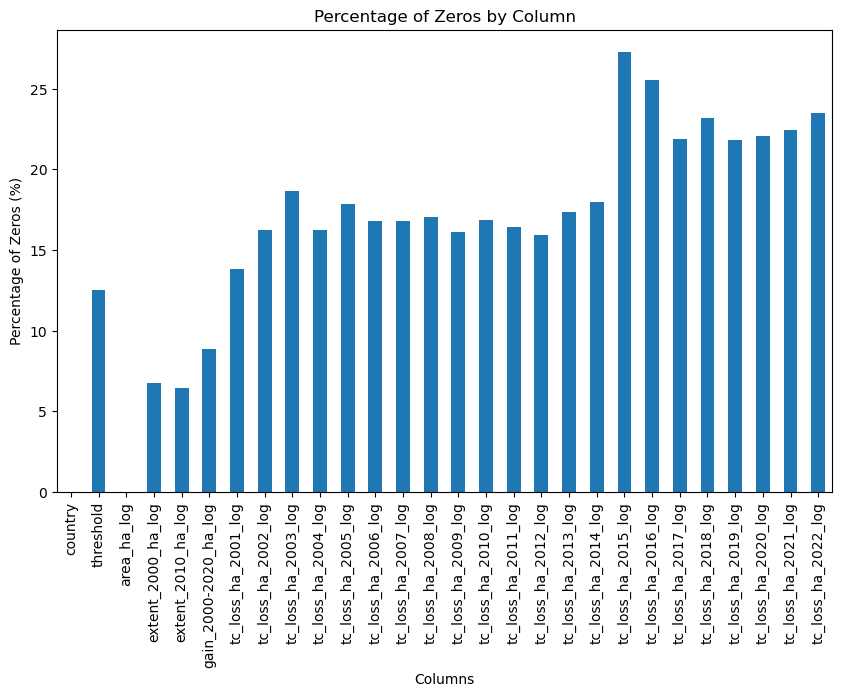

In [16]:
# Calculate the percentage of zeros across columns
percentage_zeros = (missing_data.sum(axis=0) / len(missing_data)) * 100

# Plot the bar plot with percentage of zeros
plt.figure(figsize=(10, 6))
percentage_zeros.plot(kind='bar')
plt.title('Percentage of Zeros by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Zeros (%)')
plt.xticks(rotation=90)
plt.show()

The percentage of 0's increases as time moves forward. Either there were fewer hectares of tree cover loss or data became less available.

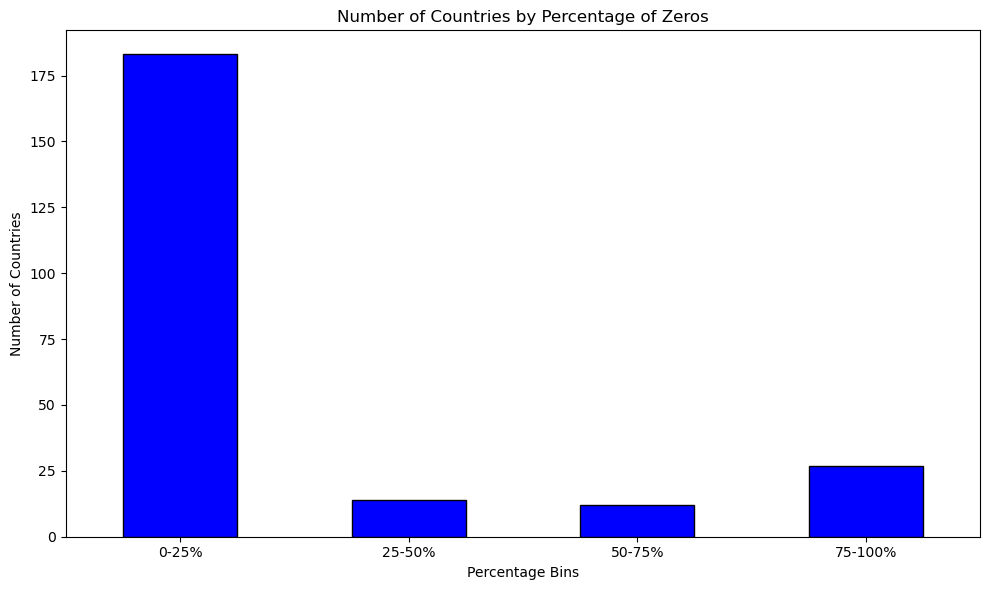

In [17]:
# Gets all columns except 'country'
columns_to_check = TC_transformed_df.columns.difference(
    ['country'])

# Groups by "country" and calculates the percentage of zeros 
percentage_zeros_by_country = TC_transformed_df.groupby(
    "country")[columns_to_check].apply(lambda x: (
    x == 0).mean() * 100)

# Calculates the mean percentage of zeros for each country
percentage_zeros_by_country['Mean_Zero_Percentage'] = \
percentage_zeros_by_country.mean(axis=1)

# Bins the countries based on their mean percentage of zeros
bins = [0, 25, 50, 75, 100]
bin_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
percentage_zeros_by_country['Percentage_Bins'] = pd.cut(
    percentage_zeros_by_country['Mean_Zero_Percentage'], 
    bins=bins, labels=bin_labels)

# Counts the number of countries in each bin
bin_counts = percentage_zeros_by_country[
    'Percentage_Bins'].value_counts().sort_index()

# Plots the results
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Countries by Percentage of Zeros')
plt.xlabel('Percentage Bins')
plt.ylabel('Number of Countries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

There are approximately 75 countries that have greater than 50% 0 values. These will be removed from the data. Either there is not enough information about them or they are doing a wonderful conservation job and are not good candidates for this model. 

In [18]:
# Filters out countries with 50% or more missing values
filtered_countries = percentage_zeros_by_country[
    percentage_zeros_by_country[
    'Mean_Zero_Percentage'] < 50]

# Gets the list of country names with less than 50% missing values
countries_to_keep = filtered_countries.index.tolist()

# Copies the original DataFrame with only the selected countries
filtered_df = TC_transformed_df[TC_transformed_df[
    'country'].isin(
    countries_to_keep)].copy()

In [19]:
unique_countries_filtered = filtered_df['country'].nunique()
print("Number of unique countries:", unique_countries_filtered)

dropped_countries = unique_countries - unique_countries_filtered
print("Number of countries removed: ", dropped_countries)

Number of unique countries: 197
Number of countries removed:  39


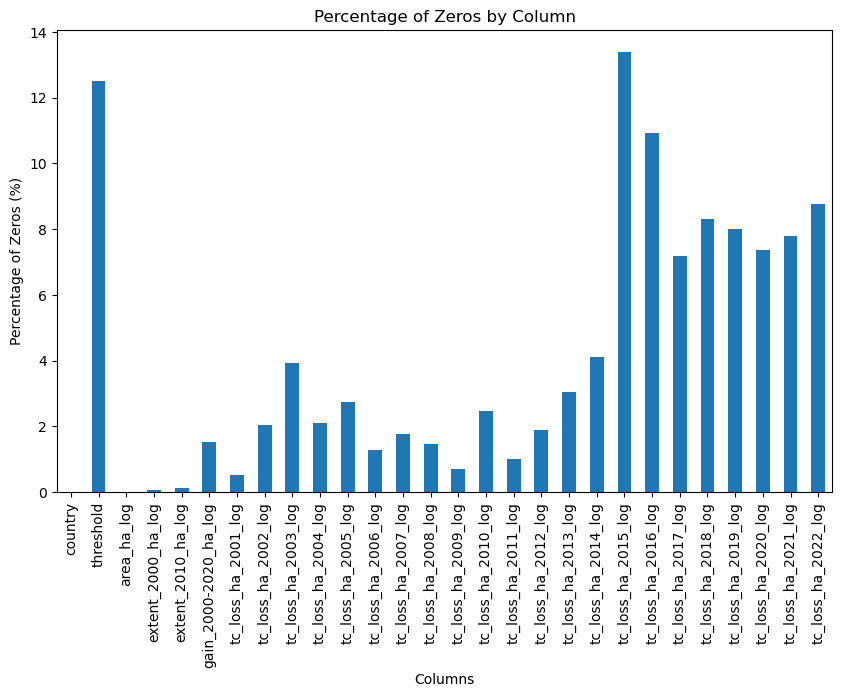

In [20]:
# Creates a new dataframe that only contains the 0's
missing_data_filtered = filtered_df == 0

# Calculates the percentage of zeros across columns
percentage_zeros = (missing_data_filtered.sum(
    axis=0) / len(missing_data_filtered)) * 100

# Plots the bar plot with percentage of zeros
plt.figure(figsize=(10, 6))
percentage_zeros.plot(kind='bar')
plt.title('Percentage of Zeros by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Zeros (%)')
plt.xticks(rotation=90)
plt.show()

Many missing data points were removed, especially from 2001 - 2014. It appears there are still quite a few 0s in the later years.

It may be possible to build a model that will predict the best numbers to impute for the missing data in the years 2015-2022. For the purposes of this class, though, it may be best to continue model building with the data as is. 

# Transformations

## Removing Columns 

The goal of the project is to predict future tree cover loss. Tree cover loss has been subset by country and threshold in this data set. The only information needed is the country, hectares lost and year. Values will be summed together by country and year to effectively remove the threshold subset

The following columns will be removed:

* threshold
* area_ha_log
* extent_2000_ha_log
* extent_2010_ha_log
* gain_2000-2020_ha_log

In [21]:
tc_dropped_df = filtered_df.copy()

columns_to_remove = ["threshold", "extent_2000_ha_log", 
                     "extent_2010_ha_log", 
                    "gain_2000-2020_ha_log", 
                     "area_ha_log"]

# Drops the specified columns
tc_dropped_df = TC_transformed_df.drop(columns = 
                                       columns_to_remove)

In [22]:
display(tc_dropped_df.head(2))

,country,tc_loss_ha_2001_log,tc_loss_ha_2002_log,tc_loss_ha_2003_log,tc_loss_ha_2004_log,tc_loss_ha_2005_log,tc_loss_ha_2006_log,tc_loss_ha_2007_log,tc_loss_ha_2008_log,tc_loss_ha_2009_log,...,tc_loss_ha_2013_log,tc_loss_ha_2014_log,tc_loss_ha_2015_log,tc_loss_ha_2016_log,tc_loss_ha_2017_log,tc_loss_ha_2018_log,tc_loss_ha_2019_log,tc_loss_ha_2020_log,tc_loss_ha_2021_log,tc_loss_ha_2022_log
0,Afghanistan,4.644391,5.370638,5.590987,5.420535,5.594711,5.153292,5.616771,4.812184,4.532599,...,2.772589,2.302585,0.0,0.0,0.0,3.496508,3.295837,3.850148,3.871201,2.772589
1,Afghanistan,4.532599,5.252273,5.537334,5.337538,5.509388,5.075174,5.560682,4.727388,4.317488,...,1.098612,1.609438,0.0,0.0,0.0,3.367296,2.995732,3.713572,3.637586,2.302585


## Summing Hectare Loss (Log) by Country

In [23]:
# Groups by country and sums
tc_dropped_df = tc_dropped_df.groupby('country').sum()

# Resets the index so country is a column
tc_dropped_df.reset_index(inplace = True)

display(tc_dropped_df.head(2))
display(tc_dropped_df.tail(2))

,country,tc_loss_ha_2001_log,tc_loss_ha_2002_log,tc_loss_ha_2003_log,tc_loss_ha_2004_log,tc_loss_ha_2005_log,tc_loss_ha_2006_log,tc_loss_ha_2007_log,tc_loss_ha_2008_log,tc_loss_ha_2009_log,...,tc_loss_ha_2013_log,tc_loss_ha_2014_log,tc_loss_ha_2015_log,tc_loss_ha_2016_log,tc_loss_ha_2017_log,tc_loss_ha_2018_log,tc_loss_ha_2019_log,tc_loss_ha_2020_log,tc_loss_ha_2021_log,tc_loss_ha_2022_log
0,Afghanistan,35.427684,40.48376,43.031687,41.227851,42.321742,38.900632,43.085475,36.123876,32.953028,...,8.147867,10.555813,0.000000,0.000000,0.000000,25.620064,22.985071,28.764719,26.645574,16.385346
1,Akrotiri and Dhekelia,7.977968,4.85203,0.000000,8.383433,0.693147,8.671115,11.025816,5.950643,10.802673,...,5.950643,5.257495,14.796528,18.092177,8.345693,6.356108,6.238325,5.257495,5.545177,0.693147


,country,tc_loss_ha_2001_log,tc_loss_ha_2002_log,tc_loss_ha_2003_log,tc_loss_ha_2004_log,tc_loss_ha_2005_log,tc_loss_ha_2006_log,tc_loss_ha_2007_log,tc_loss_ha_2008_log,tc_loss_ha_2009_log,...,tc_loss_ha_2013_log,tc_loss_ha_2014_log,tc_loss_ha_2015_log,tc_loss_ha_2016_log,tc_loss_ha_2017_log,tc_loss_ha_2018_log,tc_loss_ha_2019_log,tc_loss_ha_2020_log,tc_loss_ha_2021_log,tc_loss_ha_2022_log
234,Zimbabwe,72.314474,72.719837,72.498777,74.296710,76.223250,77.795103,75.937493,70.976940,80.886260,...,74.514584,74.389062,76.199569,75.030028,82.214724,71.742824,75.384403,70.942866,73.866162,73.009088
235,Åland,47.770411,44.953118,43.123838,52.752469,52.344189,36.838147,44.090336,57.236362,52.057204,...,49.813633,50.357829,50.571263,51.898337,52.619888,51.308253,62.062484,52.020270,57.569342,56.294563


## Histogram of Average Hectare Loss (Log)

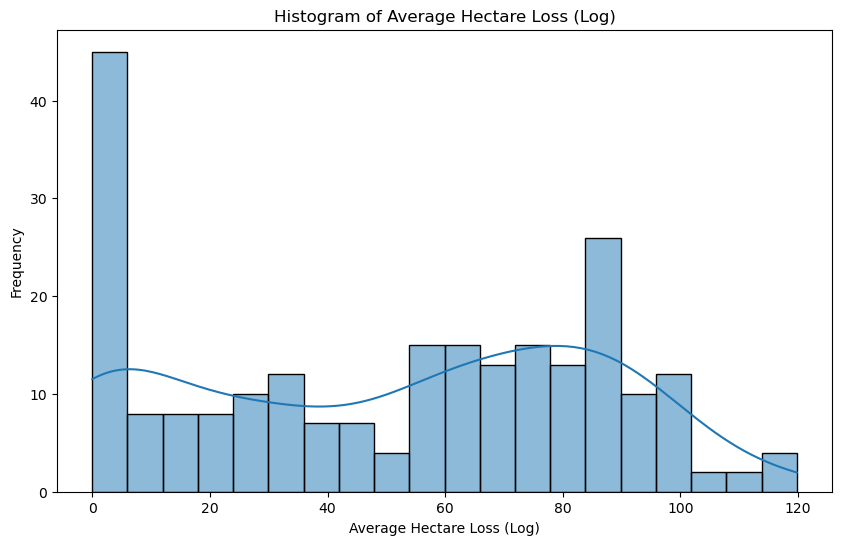

In [24]:
# Calculates average hectare loss across years for each country
tc_dropped_df['avg_loss'] = tc_dropped_df.iloc[:, 2:].mean(axis=1)

# Plots histogram of average hectare loss
plt.figure(figsize=(10, 6))
sns.histplot(data=tc_dropped_df, x='avg_loss', bins=20, kde=True)
plt.title('Histogram of Average Hectare Loss (Log)')
plt.xlabel('Average Hectare Loss (Log)')
plt.ylabel('Frequency')
plt.show()

The histogram still shows a high frequency of countries that have a very low average hectare loss (log). These will be dropped from the dataframe and modeling.

## Removing Lower Outliers

In [25]:
# Drops any countries with less than an average of 10 hectares (log)
tc_dropped_df = tc_dropped_df[tc_dropped_df['avg_loss'] > 10]

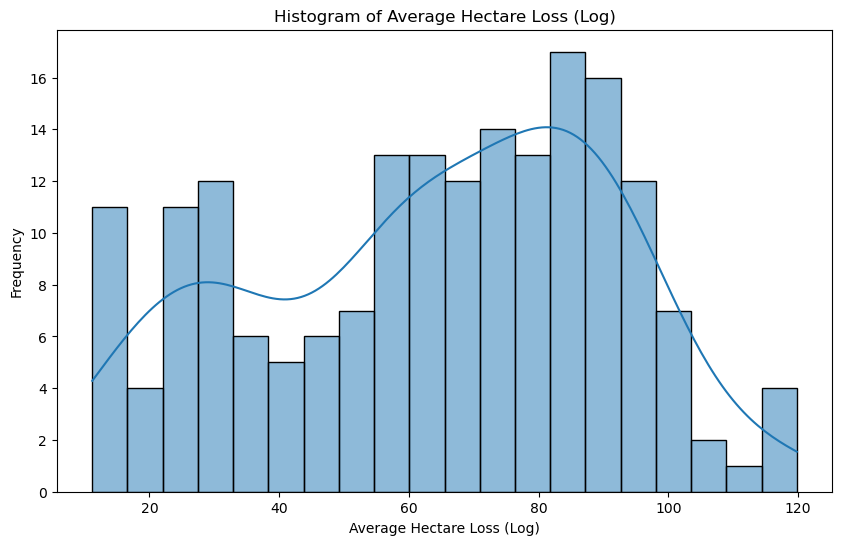

In [26]:
# Plots histogram of average hectare loss
plt.figure(figsize=(10, 6))
sns.histplot(data=tc_dropped_df, x='avg_loss', bins=20, kde=True)
plt.title('Histogram of Average Hectare Loss (Log)')
plt.xlabel('Average Hectare Loss (Log)')
plt.ylabel('Frequency')
plt.show()

The distribution has improved but is still not normally distributed. There is a wide range of average hectare loss and peaks on the lower end as well as toward the middle. 

In [27]:
unique_countries_filtered = tc_dropped_df['country'].nunique()
print("Number of unique countries:", unique_countries_filtered)

display(tc_dropped_df.head(2))

Number of unique countries: 186


,country,tc_loss_ha_2001_log,tc_loss_ha_2002_log,tc_loss_ha_2003_log,tc_loss_ha_2004_log,tc_loss_ha_2005_log,tc_loss_ha_2006_log,tc_loss_ha_2007_log,tc_loss_ha_2008_log,tc_loss_ha_2009_log,...,tc_loss_ha_2014_log,tc_loss_ha_2015_log,tc_loss_ha_2016_log,tc_loss_ha_2017_log,tc_loss_ha_2018_log,tc_loss_ha_2019_log,tc_loss_ha_2020_log,tc_loss_ha_2021_log,tc_loss_ha_2022_log,avg_loss
0,Afghanistan,35.427684,40.483760,43.031687,41.227851,42.321742,38.900632,43.085475,36.123876,32.953028,...,10.555813,0.000000,0.00000,0.000000,25.620064,22.985071,28.764719,26.645574,16.385346,26.550326
2,Albania,65.429888,54.134063,50.914944,64.424507,52.082730,54.788961,68.258083,68.596781,57.413636,...,55.825591,45.661433,54.83452,59.837247,61.143872,56.170145,56.449697,59.891361,61.415970,58.156005


## Melting the Dataframe

In [28]:
tc_melted_df = tc_dropped_df.drop(columns = ['avg_loss']).copy()


# Melts the data frame from wide to long format
tc_melted_df = pd.melt(tc_melted_df, id_vars=["country"], 
                       var_name="Year", value_name="tc_loss_ha")

In [29]:
# Extracts the year information
tc_melted_df["Year"] = tc_melted_df[
    "Year"].str.extract("(\d+)").astype(int)

In [30]:
display(tc_melted_df.head(2))
display(tc_melted_df.tail(2))

,country,Year,tc_loss_ha
0,Afghanistan,2001,35.427684
1,Albania,2001,65.429888


,country,Year,tc_loss_ha
4090,Zimbabwe,2022,73.009088
4091,Åland,2022,56.294563


## Formatting Year

In [31]:
tc_melted_df['Year'] = pd.to_datetime(tc_melted_df['Year'], 
                                      format='%Y')

In [32]:
print(tc_melted_df.shape)
display(tc_melted_df.head(2))

(4092, 3)


,country,Year,tc_loss_ha
0,Afghanistan,2001-01-01,35.427684
1,Albania,2001-01-01,65.429888


In [33]:
# Groups by year and finds the mean
avg_by_year = tc_melted_df.groupby(tc_melted_df[
    "Year"])['tc_loss_ha'].mean()

# Creates a new Dataframe from the result
tc_final = pd.DataFrame({'Year': avg_by_year.index, 
                         'Mean_Loss': avg_by_year.values})

tc_final.set_index('Year', inplace=True)

In [34]:
display(tc_final.head(2))
print(tc_final.shape)

,Mean_Loss
Year,
2001-01-01,62.570949
2002-01-01,61.941970


(22, 1)


In [35]:
tc_final = tc_final.resample('Y').mean(numeric_only=True)

## Stationarity

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
# Creates series of loss data
loss_data = tc_final["Mean_Loss"]

# Runs adfuller on the loss data series
result = adfuller(loss_data)

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")

ADF Statistic: -3.4803224648239985
p-value: 0.008507071939635985
Critical Values:
   1%: -3.7883858816542486
   5%: -3.013097747543462
   10%: -2.6463967573696143
Data is stationary


## Autocorrelation

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

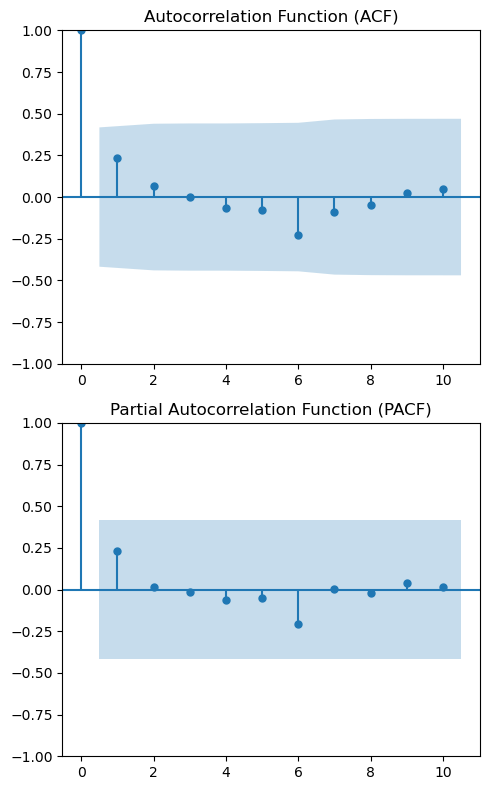

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(5, 8))

# Plots the ACF
sm.graphics.tsa.plot_acf(tc_final['Mean_Loss'], 
                         lags=10, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# Plots the PACF
sm.graphics.tsa.plot_pacf(tc_final['Mean_Loss'], 
                          lags=10, ax=ax[1], method='ywm')
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

There do not appear to be any strong correlations between observations based on time. The data points are all relatively independent of one another. This may make forecasting more difficult.

## Trends

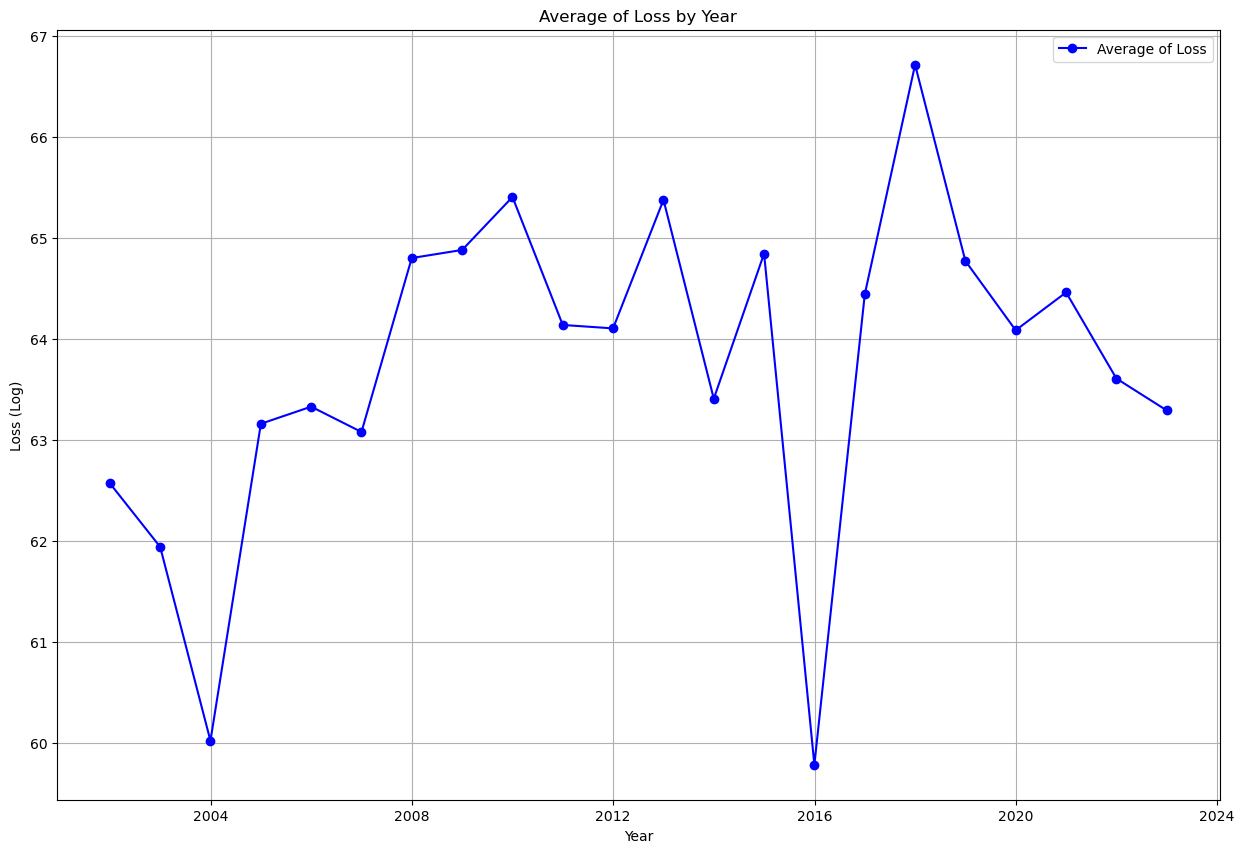

In [40]:
plt.figure(figsize=(15, 10))
plt.plot(tc_final.index, tc_final.values, marker='o', linestyle='-', 
         color='blue', label='Average of Loss')

plt.title('Average of Loss by Year')
plt.xlabel('Year')
plt.ylabel('Loss (Log)')
plt.legend()
plt.grid(True)
plt.show()

# Modeling

## Split the Data

In [41]:
# Filters for the year 2022
validation_set = tc_final.loc["2022-01-01":]

# Filters all prior data as the training set                        
train_set = tc_final.loc[:"2021-01-01"]

print("Training set size:", len(train_set))
print("Test set size:", len(validation_set))

Training set size: 20
Test set size: 1


In [42]:
display("Training Set", train_set.head(2))
display("Validation Set", validation_set.head(2))

'Training Set'

,Mean_Loss
Year,
2001-12-31,62.570949
2002-12-31,61.941970


'Validation Set'

,Mean_Loss
Year,
2022-12-31,63.292227


In [43]:
# Splitting the data into features (X) and target (y)
X_train = train_set.index.values.reshape(-1, 1)
y_train = train_set["Mean_Loss"]

X_test = validation_set.index.values.reshape(-1, 1)  
y_test = validation_set["Mean_Loss"]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (20, 1)
y_train: (20,)
X_test: (1, 1)
y_test: (1,)


## ARIMA

In [44]:
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

import warnings

In [45]:
# Filters out the user warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [46]:
p_values = [0, 1, 2]  
d_values = [0, 1]     
q_values = [0, 1, 2]

In [47]:
best_model = None
best_metrics = {
    'mse': np.inf,
    'rmse': np.inf
}

In [48]:
freq = pd.infer_freq(tc_final.index)

In [49]:
for p, d, q in product(p_values, d_values, q_values):
    # Train ARIMA model
    try:
        model = ARIMA(train_set['Mean_Loss'], order=(p, d, q), 
                      freq='Y', dates=train_set.index)
        model_fit = model.fit()
        
        # Forecast on validation set
        forecast_log = model_fit.forecast(steps=len(validation_set))
        
        # Convert forecasts from log units to original units
        forecast_original = np.exp(forecast_log)  
        
        # Calculate evaluation metrics
        mse_arima = mean_squared_error(validation_set['Mean_Loss'], 
                                 forecast_original)
        rmse_arima = np.sqrt(mse_arima)
                
        # Update best model if current model performs better
        if mse_arima < best_metrics['mse']:
            best_model = model_fit
            best_metrics = {
                'mse': mse_arima,
                'rmse': rmse_arima
            }
    except Exception as e:
        # Log any exceptions that occur during model fitting
        print(f"Error fitting model with parameters (\
              p={p}, d={d}, q={q}): {e}")

In [50]:
# Print best model parameters and evaluation metrics
print("Best model parameters: p={}, d={}, q={}"\
      .format(best_model.model.order[0],
                best_model.model.order[1],
                best_model.model.order[2]))
print("Best model evaluation metrics:")
print("MSE:", best_metrics['mse'])
print("RMSE:", best_metrics['rmse'])

Best model parameters: p=0, d=0, q=0
Best model evaluation metrics:
MSE: 2.4320106923541455e+55
RMSE: 4.931542043168795e+27


## Gradient Boosting Model

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
# Initialize and train the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, 
                                learning_rate=0.1, 
                                max_depth=3)
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm.predict(X_test)

# Transform predictions back to the original scale
y_test_original_scale = np.exp(y_test)
y_pred_original_scale = np.exp(y_pred)

# Evaluate the model
mse_gb = mean_squared_error(y_test_original_scale, 
                            y_pred_original_scale)
rsme_gb = np.sqrt(mse_gb)

print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rsme_gb)

Mean Squared Error: 4.794315676438011e+55
Root Mean Squared Error: 6.924099707859507e+27


# Evaluating Results

In [53]:
# Finds range of the weighted values
original_min = tc_final['Mean_Loss'].min()
original_max = tc_final['Mean_Loss'].max()

print("Dataset Ranges:")
print("Min: ", np.exp(original_min))
print("Max: ", np.exp(original_max))

print("\nARIMA Best Model:")
print("MSE: ", mse_arima)
print("RMSE: ", rmse_arima)

print("\nGB Best Model:")
print("MSE: ", mse_gb)
print("RMSE: ", rsme_gb)

Dataset Ranges:
Min:  9.229132602860082e+25
Max:  9.387094836177135e+28

ARIMA Best Model:
MSE:  9.105078761886575e+55
RMSE:  9.542053637391992e+27

GB Best Model:
MSE:  4.794315676438011e+55
RMSE:  6.924099707859507e+27
